## Regressão Logística

In [82]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline



In [43]:
data = pd.read_csv('ex2data1.txt', header = None, names = ['test1', 'test2', 'approved'])
data.head()

,test1,test2,approved
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [44]:
#Normalizing
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
dataValuesNormalized = normalizer.fit_transform( data.drop('approved', axis = 1).values )
dataNormalized = pd.DataFrame( dataValuesNormalized, columns = ['test1', 'test2'] )
dataNormalized['approved'] = data['approved']

print('Dados Normalizados:')
dataNormalized.head()

Dados Normalizados:


,test1,test2,approved
0,0.405610,0.914046,0
1,0.567915,0.823087,0
2,0.441259,0.897380,0
3,0.571973,0.820273,1
4,0.723794,0.690016,1


### Gráfico

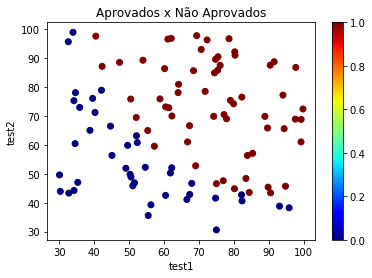

In [45]:
#Data plotting
plt.scatter(x = data['test1'], y = data['test2'], 
            c = data['approved'], cmap = plt.get_cmap('jet'))
cbar = plt.colorbar()
plt.xlabel('test1')
plt.ylabel('test2')
plt.title('Aprovados x Não Aprovados')

In [112]:
# Stochastic Gradient Descent
def predict(X, theta):
    linear = theta[0] + np.dot(X, theta[1:])
    return float(1) / ( 1 + math.exp(-linear) )

def sgd(X_train, y_train, X_test, y_test, eta, epochs):
    theta = np.random.randn(1 + X_train.shape[1])
    errors = []
    
    for epoch in range(epochs):
        sum_error = 0
        
        for f, target in zip(X_train,y_train):
            ypred = predict(f, theta)
            error = target - ypred
            # Cost Function
            update = eta * error * ypred * (1 - ypred)
            
            theta[0] += update
            theta[1:] += update * f
        
        for f_Test, targetTest in zip(X_test, y_test):
            ypred = predict(f_Test, theta)
            error = targetTest - ypred
            sum_error = error**2    
        
        errors.append(sum_error/X_test.shape[0])
    
    return (theta, np.array(errors))


In [113]:
# Samples
dataTrain = dataNormalized.iloc[:70]
dataTest = dataNormalized.iloc[70:]

# Train Data
dataTrain_X = dataTrain.drop('approved', axis = 1)
dataTrain_Y = dataTrain['approved']

# Test Data
dataTest_X = dataTest.drop('approved', axis = 1)
dataTest_Y = dataTest['approved']


In [114]:
#Hyperparameters
eta = 0.01
epochs = 1000

In [115]:
theta, errors = sgd( dataTrain_X.values, dataTrain_Y.values, dataTest_X.values, dataTest_Y.values, eta, epochs )

## Resultados

### Coeficientes finais

In [123]:
print(theta)

[-0.65996321  1.50801104 -0.42896584]


### Gráfico

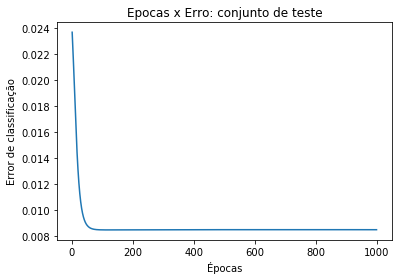

In [121]:
plt.plot( np.arange(1, errors.shape[0]+1), errors, '-' )
plt.xlabel('Épocas')
plt.ylabel('Error de classificação')
plt.title('Epocas x Erro: conjunto de teste')


### Erro de classificação final

In [124]:
errors[-1]

0.0085220168165226137

### Podemos observar, a partir do gráfico, que o algoritmo está aprendendo conforme a iteração das épocas. No entanto, o aprendizado é substancial até a época 70 aproximadamente, pois a partir de então, o erro é constante, não significando mais aprendizado

### Executando Kfold, com K = 10

In [125]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

dataNormalizedX = dataNormalized.drop('approved', axis = 1).values
dataNormalizedY = dataNormalized['approved'].values

thetas = []

for train_indexes, test_indexes in kf.split(dataNormalizedX):
    X_train, X_test = dataNormalizedX[train_indexes], dataNormalizedX[test_indexes]
    y_train, y_test = dataNormalizedY[train_indexes], dataNormalizedY[test_indexes]
    
    theta, errors = sgd( X_train, y_train, X_test, y_test, eta, epochs )
    thetas.append(theta)

### Coeficientes:

In [131]:
print(np.array(thetas))

[[ 0.70541286 -0.38768587 -0.00809941]
 [-1.34728826  2.21626864  0.38018069]
 [ 0.59552662  0.68763263 -0.75776238]
 [ 0.82192019 -0.09614136 -0.34162538]
 [ 1.23254335  0.02407402 -1.1571358 ]
 [ 0.29120896  0.11658831  0.07824913]
 [ 0.01348592  1.14513744 -0.39179661]
 [ 0.11169786  1.32729054 -0.90085418]
 [-0.76556357  1.25828535  0.33422654]
 [-0.10306264  0.97746334 -0.38677226]]
